In [1]:
from fit_intervention import Latent_Interventions
import fit_intervention
import pathlib
import tensorflow as tf

In [2]:
import functions

In [12]:

# could also load this from a json file
meta_data = {}
meta_data["dataset"] = "cifar10" #cifar10
meta_data["normalize"] = None #{"mean":120.707, "std":64.15} # None
meta_data["model_name"] = "cifar10"#"cifar10_vgg16" #cifar10

# classifier config
meta_data["epochs"] = 10#50#10
meta_data["post_epochs"] = 4
meta_data["optim"] = "Adam"
meta_data["optim_config"] = tf.keras.optimizers.Adam().get_config()
meta_data["batch_size"] = 64 #*8 # 512 batch_size behaves weirdly...

# intervention config
meta_data["layer_key"] = 'classifier' # which latent layer output should be used for embedding
meta_data["contraction_factors"] = {"all": (1.0/2.0, 1.0/4.0)} # how much should the class points in the embedding be shifted to their center of mass
meta_data["shift_factors"] = {} # how much should the class points be shifted in a certain direction

# embedder config
meta_data["embedding_approach"] = "umap" # one of: ["umap", "tsne"]
meta_data["embedding_optim"] = "Adam"
meta_data["embedding_optim_config"] = tf.keras.optimizers.Adam().get_config()
meta_data["embedding_epochs"] = 5 #1 for umap #5 for tsne
meta_data["embedding_batch_size"] = 500
meta_data["embedding_subset"] = 12 # subset that should be selected for training the embedding
meta_data["embedding_weight"] = 0.4 # how much influence should the embedding loss have on training the classifier
# meta_data["embedding_conf"] = {'layer_dims': [300,100], 'alpha': 1.0, 'perplexities': 100, 'do_pretrain': True, 'beta_batch_size':256} #500,1000} # embedding approach speciffic configuration
meta_data["embedding_conf"] = {} # for unet we dont need any special config for now


meta_data["experiment_number"] = 0
# path = pathlib.Path().absolute()
# path = "D:/ICG/Experiments/%s/Experiment-converged-net/Experiment--05"%meta_data["dataset"]
# path = "D:/ICG/Experiments/%s/Experiment-tsne-weights-2/Experiment-weight"%meta_data["dataset"]
# path = "D:/ICG/Experiments/%s/Experiment-umap-embepochs-2/Experiment-embepoch"%meta_data["dataset"]
# path = "D:/ICG/Experiments/%s/Experiment-tsne-layers/Experiment-layer"%meta_data["dataset"]
# path = "D:/ICG/Experiments/%s/Experiment-umap-contraction_factors/Experiment-contraction_factor"%meta_data["dataset"]

meta_data["base_path"] = path

In [20]:
pli = Latent_Interventions(meta_data, verbose=1)

In [21]:
# pli.load_models()
# fit_intervention.plot_embeddings_from_pli(pli)

In [22]:
# pli()
pli.save_meta_data()
pli.fit_basemodel()
# pli.fit_embedding()
# pli.fit_intervention()

saved file to D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/meta_data.json
Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 94s 2ms/sample - loss: 1.4549 - accuracy: 0.7511
Epoch 2/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.5695 - accuracy: 0.7854
Epoch 3/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.6416 - accuracy: 0.7916
Epoch 4/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.7141 - accuracy: 0.7936
Epoch 5/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.7589 - accuracy: 0.7903
Epoch 6/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.7560 - accuracy: 0.7969
Epoch 7/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.7748 - accuracy: 0.7961
Epoch 8/50
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.7604 - accuracy: 0.7957
Epoch 9/50
50000/50000 [=

In [23]:
pli.fit_embedding()

ParametricUMAP(batch_size=500, loss_report_frequency=1,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000248869E17C8>)
Construct fuzzy simplicial set
Tue Nov 17 11:50:32 2020 Finding Nearest Neighbors
Tue Nov 17 11:50:32 2020 Building RP forest with 8 trees
Tue Nov 17 11:50:32 2020 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Tue Nov 17 11:50:32 2020 Finished Nearest Neighbor Search
Tue Nov 17 11:50:32 2020 Construct embedding


Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1067 steps
4167/4167 [==============================] - 0s 37us/sample
Tue Nov 17 11:50:42 2020 Finished embedding
D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/embeddermodel\parametric_model.h5
Tue Nov 17 11:50:42 2020 Worst tree score: 0.96256299
Tue Nov 17 11:50:42 2020 Mean tree score: 0.96829254
Tue Nov 17 11:50:42 2020 Best tree score: 0.97360211
T

train embedding of experiment nr. 0 with 


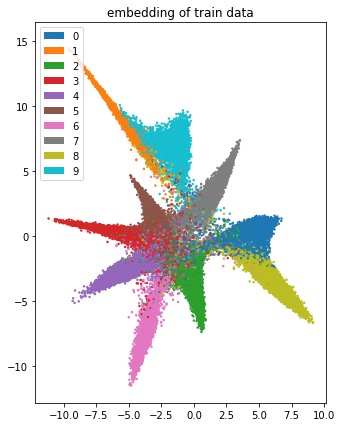

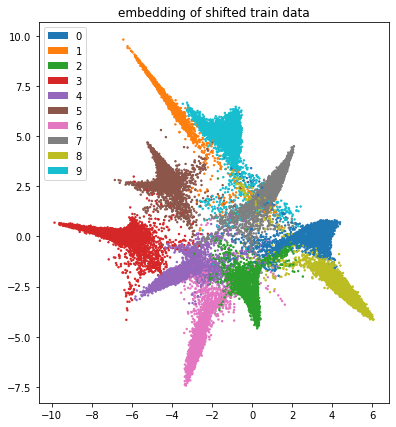

OSError: SavedModel file does not exist at: D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/classifiermodel-weights-after-baseline.h5/{saved_model.pbtxt|saved_model.pb}

In [29]:
# pli.shift_factors = {3:[-3.,0.], 5:[-2.,2.]}
fit_intervention.plot_embeddings_from_pli(pli)

In [30]:
meta_data["shift_factors"] = {3:[-3.,0.], 5:[-2.,2.]}
pli = Latent_Interventions(meta_data, verbose=1)
pli.save_meta_data()
pli.fit_intervention()

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
saved file to D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/meta_data.json
classifier model was None; load model from  D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/classifiermodel-weights-before.h5 instead
embedder model was None; load model from  D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/embeddermodel instead
Tue Nov 17 12:57:33 2020 Building and compiling search function
Pickle of ParametricUMAP model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/embeddermodel\model.pkl
Keras encoder model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--05/embeddermodel\encoder_model.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
Wed Nov 11 12:50:14 2020 Building and compiling search function
Pickle of ParametricUMAP model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/embeddermodel\model.pkl
Keras encoder model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/embeddermodel\encoder_model.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Keras full model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/embeddermodel\parametric_model.h5
train embedding of experiment nr. 0 with 


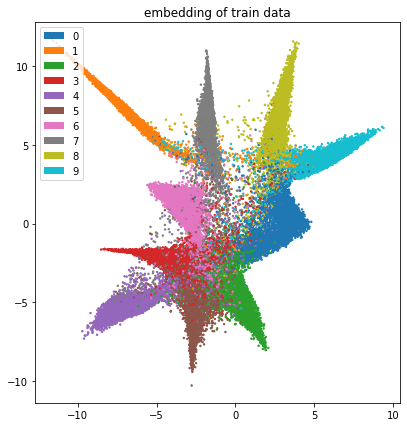

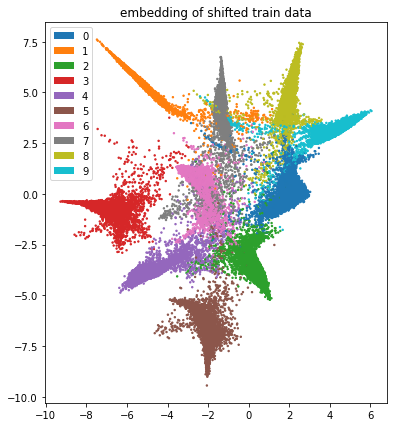

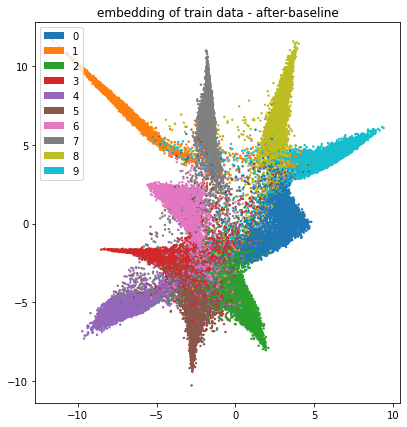

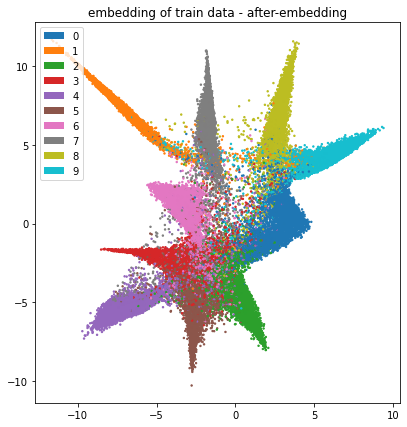

In [7]:
use_experiments = ['D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--01/', 'D:/ICG/Experiments/cifar10/Experiment-converged-net/Experiment--02/']
# fit_intervention.test_set_evaluation(use_experiments)
fit_intervention.plot_embeddings_from_pli_list_train(use_experiments)

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
Mon Nov  9 17:21:59 2020 Building and compiling search function
Pickle of ParametricUMAP model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/embeddermodel\model.pkl
Keras encoder model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/embeddermodel\encoder_model.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Keras full model loaded from D:/ICG/Experiments/cifar10/Experiment-converged-net/embeddermodel\parametric_model.h5

test-set evaluation of experiment nr. 0 with 


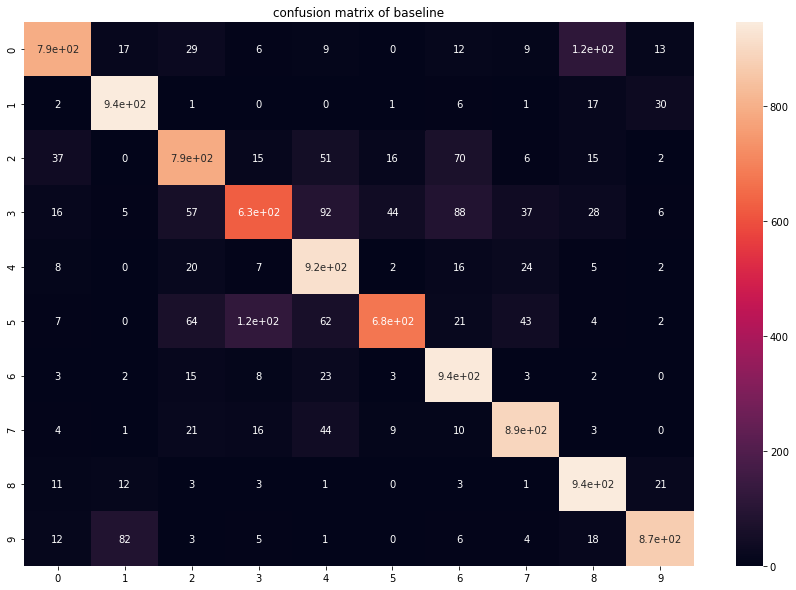

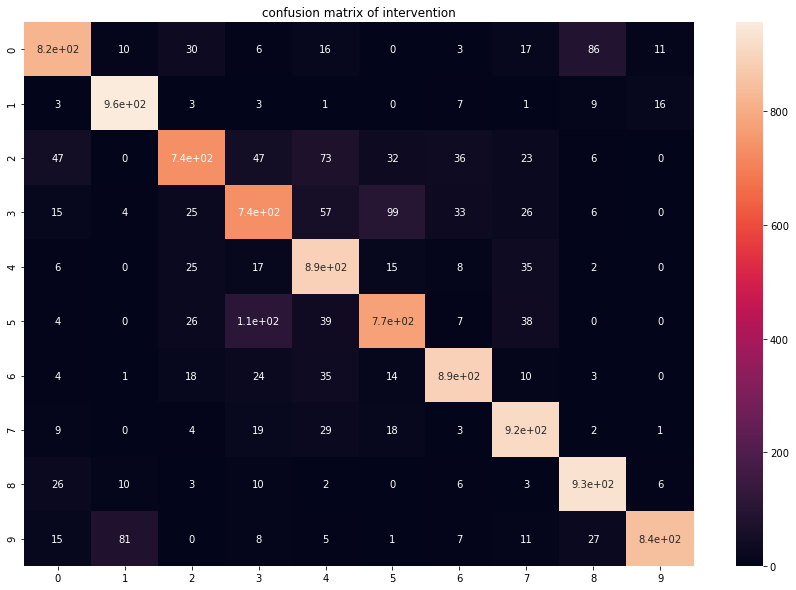

test accuracy of baseline: 0.8385
test accuracy of intervention: 0.85


(array([0.8385]), array([0.85]))

In [27]:
fit_intervention.test_set_evaluation(use_experiments, plot_cm=True)


In [24]:
# try factors: 1.2, 2.0, 3.0, 4.0
counter = 1
for contraction_factor in [{"all": (1.0/1.2, 1.0/1.2)}, {"all": (1.0/1.2, 1.0/2.0)}, {"all": (1.0/1.2, 1.0/3.0)}, {"all": (1.0/1.2, 1.0/4.0)}, {"all": (1.0/2.0, 1.0/1.2)}, {"all": (1.0/2.0, 1.0/2.0)}, {"all": (1.0/2.0, 1.0/3.0)}, {"all": (1.0/2.0, 1.0/4.0)}, {"all": (1.0/3.0, 1.0/1.2)}, {"all": (1.0/3.0, 1.0/2.0)}, {"all": (1.0/3.0, 1.0/3.0)}, {"all": (1.0/3.0, 1.0/4.0)}, {"all": (1.0/4.0, 1.0/1.2)}, {"all": (1.0/4.0, 1.0/2.0)}, {"all": (1.0/4.0, 1.0/3.0)}, {"all": (1.0/4.0, 1.0/4.0)}]:
    meta_data["contraction_factors"] = contraction_factor
    meta_data["experiment_number"] = 0
    print("\n+++ start of experiment with contraction_factor=%s +++"%contraction_factor)

    for j in range(1, 11): # perform same experiments with different initialisations
        meta_data["experiment_number"] += 1
        meta_data["base_path"] = "%s-%d--%02d"%(path, counter, meta_data["experiment_number"])
        print("+++ start of iteration %s +++"%j)
        pli = Latent_Interventions(meta_data)#, verbose=1)
        pli()
    counter += 1


+++ start of experiment with contraction_factor={'all': (0.8333333333333334, 0.8333333333333334)} +++
+++ start of iteration 1 +++
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
saved file to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--01/classifiermodel-history-before.json
--fitting embedder model--


Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1137 steps
1137/1137 [==============================] - 9s 8ms/step - loss: 0.2299
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1163 steps
1163/1163 [==============================] - 9s 8ms/step - loss: 0.2299
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1108 steps
1108/1108 [==============================] - 9s 8ms/step - loss: 0.2211
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
1119/1119 [==============================] - 8s 8ms/step - loss: 0.2267
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1120 steps
1120/1120 [==============================] - 9s 8ms/step - loss: 0.2264
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
1100/1100 [==============================] - 8s 8ms/step - loss: 0.2272
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1135 steps
1135/1135 [==============================] - 9s 8ms/step - loss: 0.2191
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1131 steps
1131/1131 [==============================] - 9s 8ms/step - loss: 0.2257
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1142 steps
1142/1142 [==============================] - 9s 8ms/step - loss: 0.2242
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1117 steps
1117/1117 [==============================] - 9s 8ms/step - loss: 0.2254
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-1--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1132 steps
1132/1132 [==============================] - 9s 8ms/step - loss: 0.2244
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1109 steps
1109/1109 [==============================] - 9s 8ms/step - loss: 0.2367
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1079 steps
1079/1079 [==============================] - 8s 8ms/step - loss: 0.2228
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1137 steps
1137/1137 [==============================] - 10s 9ms/step - loss: 0.2261
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1073 steps
1073/1073 [==============================] - 8s 8ms/step - loss: 0.2236
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1075 steps
1075/1075 [==============================] - 8s 8ms/step - loss: 0.2462
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
1100/1100 [==============================] - 9s 8ms/step - loss: 0.2185
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1086 steps
1086/1086 [==============================] - 9s 9ms/step - loss: 0.2240
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1136 steps
1136/1136 [==============================] - 8s 7ms/step - loss: 0.2314
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1122 steps
1122/1122 [==============================] - 9s 8ms/step - loss: 0.2198
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-2--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1135 steps
1135/1135 [==============================] - 9s 8ms/step - loss: 0.2243
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1142 steps
1142/1142 [==============================] - 9s 8ms/step - loss: 0.2317
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1074 steps
1074/1074 [==============================] - 8s 8ms/step - loss: 0.2285
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1108 steps
1108/1108 [==============================] - 8s 8ms/step - loss: 0.2176
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
1107/1107 [==============================] - 9s 8ms/step - loss: 0.2211
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1124 steps
1124/1124 [==============================] - 9s 8ms/step - loss: 0.2288
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
1100/1100 [==============================] - 9s 8ms/step - loss: 0.2200
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1132 steps
1132/1132 [==============================] - 9s 8ms/step - loss: 0.2238
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
1107/1107 [==============================] - 8s 7ms/step - loss: 0.2260
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
1114/1114 [==============================] - 9s 8ms/step - loss: 0.2265
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-3--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1110 steps
1110/1110 [==============================] - 8s 8ms/step - loss: 0.2278
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1159 steps
1159/1159 [==============================] - 9s 8ms/step - loss: 0.2363
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1101 steps
1101/1101 [==============================] - 9s 8ms/step - loss: 0.2271
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1096 steps
1096/1096 [==============================] - 8s 8ms/step - loss: 0.2204
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1126 steps
1126/1126 [==============================] - 9s 8ms/step - loss: 0.2330
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1087 steps
1087/1087 [==============================] - 9s 8ms/step - loss: 0.2295
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
1107/1107 [==============================] - 9s 8ms/step - loss: 0.2217
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1101 steps
1101/1101 [==============================] - 9s 8ms/step - loss: 0.2313
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2237
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
1100/1100 [==============================] - 10s 9ms/step - loss: 0.2294
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-4--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1110 steps
1110/1110 [==============================] - 8s 8ms/step - loss: 0.2208
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1104 steps
1104/1104 [==============================] - 9s 8ms/step - loss: 0.2343
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1112 steps
1112/1112 [==============================] - 9s 8ms/step - loss: 0.2281
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1116 steps
1116/1116 [==============================] - 10s 9ms/step - loss: 0.2270
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1123 steps
1123/1123 [==============================] - 9s 8ms/step - loss: 0.2224
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1125 steps
1125/1125 [==============================] - 9s 8ms/step - loss: 0.2243
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1121 steps
1121/1121 [==============================] - 9s 8ms/step - loss: 0.2284A: 0s - lo
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-cont

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1127 steps
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2265
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1099 steps
1099/1099 [==============================] - 9s 8ms/step - loss: 0.2249
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1088 steps
1088/1088 [==============================] - 9s 8ms/step - loss: 0.2223
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-5--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1125 steps
1125/1125 [==============================] - 9s 8ms/step - loss: 0.2275
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
1134/1134 [==============================] - 10s 9ms/step - loss: 0.2230
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1103 steps
1103/1103 [==============================] - 8s 8ms/step - loss: 0.2266
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1078 steps
1078/1078 [==============================] - 8s 8ms/step - loss: 0.2225
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1118 steps
1118/1118 [==============================] - 9s 8ms/step - loss: 0.2242
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1122 steps
1122/1122 [==============================] - 9s 8ms/step - loss: 0.2295
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1111 steps
1111/1111 [==============================] - 8s 8ms/step - loss: 0.2216A: 
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1096 steps
1096/1096 [==============================] - 8s 7ms/step - loss: 0.2262
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1086 steps
1086/1086 [==============================] - 8s 8ms/step - loss: 0.2264
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1131 steps
1131/1131 [==============================] - 10s 9ms/step - loss: 0.2183
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-6--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1120 steps
1120/1120 [==============================] - 9s 8ms/step - loss: 0.2205
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1110 steps
1110/1110 [==============================] - 9s 8ms/step - loss: 0.2371
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1120 steps
1120/1120 [==============================] - 9s 8ms/step - loss: 0.2232A: 0s - lo
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-cont

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1155 steps
1155/1155 [==============================] - 9s 8ms/step - loss: 0.2207
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1122 steps
1122/1122 [==============================] - 9s 8ms/step - loss: 0.2232
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
1107/1107 [==============================] - 9s 8ms/step - loss: 0.2260
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2238
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1127 steps
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2250
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1130 steps
1130/1130 [==============================] - 9s 8ms/step - loss: 0.2266
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1121 steps
1121/1121 [==============================] - 9s 8ms/step - loss: 0.2267
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-7--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1123 steps
1123/1123 [==============================] - 9s 8ms/step - loss: 0.2227
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1090 steps
1090/1090 [==============================] - 8s 8ms/step - loss: 0.2330
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2272
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1070 steps
1070/1070 [==============================] - 10s 9ms/step - loss: 0.2225
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1117 steps
1117/1117 [==============================] - 9s 8ms/step - loss: 0.2212
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2333
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1106 steps
1106/1106 [==============================] - 8s 8ms/step - loss: 0.2242
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1104 steps
1104/1104 [==============================] - 8s 8ms/step - loss: 0.2220
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1135 steps
1135/1135 [==============================] - 11s 9ms/step - loss: 0.2311
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_f

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
1100/1100 [==============================] - 9s 8ms/step - loss: 0.2227
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-8--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1138 steps
1138/1138 [==============================] - 9s 8ms/step - loss: 0.2284
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1129 steps
1129/1129 [==============================] - 9s 8ms/step - loss: 0.2288
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1139 steps
1139/1139 [==============================] - 9s 8ms/step - loss: 0.2259A: 0s - loss: 0.225
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
1114/1114 [==============================] - 9s 8ms/step - loss: 0.2205
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
1100/1100 [==============================] - 9s 8ms/step - loss: 0.2237
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1135 steps
1135/1135 [==============================] - 9s 8ms/step - loss: 0.2271
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1117 steps
1117/1117 [==============================] - 9s 8ms/step - loss: 0.2252
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1124 steps
1124/1124 [==============================] - 9s 8ms/step - loss: 0.2266
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1099 steps
1099/1099 [==============================] - 9s 8ms/step - loss: 0.2309
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1122 steps
1122/1122 [==============================] - 9s 8ms/step - loss: 0.2311
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-9--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_fa

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1072 steps
1072/1072 [==============================] - 8s 8ms/step - loss: 0.2267
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1112 steps
1112/1112 [==============================] - 9s 8ms/step - loss: 0.2330A: 0s - loss
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1113 steps
1113/1113 [==============================] - 9s 8ms/step - loss: 0.2282
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1083 steps
1083/1083 [==============================] - 8s 8ms/step - loss: 0.2189
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1098 steps
1098/1098 [==============================] - 9s 8ms/step - loss: 0.2221
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1116 steps
1116/1116 [==============================] - 9s 8ms/step - loss: 0.2294
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1138 steps
1138/1138 [==============================] - 9s 8ms/step - loss: 0.2261
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1111 steps
1111/1111 [==============================] - 9s 8ms/step - loss: 0.2274
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1127 steps
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2256
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1099 steps
1099/1099 [==============================] - 9s 8ms/step - loss: 0.2270
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-10--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1132 steps
1132/1132 [==============================] - 9s 8ms/step - loss: 0.2182
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1127 steps
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2327
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1125 steps
1125/1125 [==============================] - 9s 8ms/step - loss: 0.2331
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1102 steps
1102/1102 [==============================] - 9s 8ms/step - loss: 0.2264
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1059 steps
1059/1059 [==============================] - 8s 8ms/step - loss: 0.2311
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2349
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1122 steps
1122/1122 [==============================] - 9s 8ms/step - loss: 0.2267
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1099 steps
1099/1099 [==============================] - 9s 8ms/step - loss: 0.2295
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1143 steps
1143/1143 [==============================] - 9s 8ms/step - loss: 0.2349A: 0s - l
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-co

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1092 steps
1092/1092 [==============================] - 9s 8ms/step - loss: 0.2266
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-11--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1084 steps
1084/1084 [==============================] - 8s 8ms/step - loss: 0.2289
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1103 steps
1103/1103 [==============================] - 9s 8ms/step - loss: 0.2272
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1131 steps
1131/1131 [==============================] - 9s 8ms/step - loss: 0.2250
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1113 steps
1113/1113 [==============================] - 9s 8ms/step - loss: 0.2205
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2277
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1126 steps
1126/1126 [==============================] - 9s 8ms/step - loss: 0.2269
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1092 steps
1092/1092 [==============================] - 8s 7ms/step - loss: 0.2206
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1117 steps
1117/1117 [==============================] - 9s 8ms/step - loss: 0.2194
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1142 steps
1142/1142 [==============================] - 9s 8ms/step - loss: 0.2254
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1110 steps
1110/1110 [==============================] - 9s 8ms/step - loss: 0.2283
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-12--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
1107/1107 [==============================] - 9s 8ms/step - loss: 0.2252
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
1114/1114 [==============================] - 12s 10ms/step - loss: 0.2266
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contracti

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1106 steps
1106/1106 [==============================] - 9s 8ms/step - loss: 0.2254
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2225
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1135 steps
1135/1135 [==============================] - 9s 8ms/step - loss: 0.2180
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1087 steps
1087/1087 [==============================] - 8s 8ms/step - loss: 0.2280
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1159 steps
1159/1159 [==============================] - 9s 8ms/step - loss: 0.2236
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1125 steps
1125/1125 [==============================] - 9s 8ms/step - loss: 0.2246
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1126 steps
1126/1126 [==============================] - 9s 8ms/step - loss: 0.2219
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1144 steps
1144/1144 [==============================] - 9s 8ms/step - loss: 0.2255A: 0s - loss: 0.2
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-13--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1094 steps
1094/1094 [==============================] - ETA: 0s - loss: 0.227 - 9s 8ms/step - loss: 0.2276
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1084 steps
1084/1084 [==============================] - 11s 10ms/step - loss: 0.2293
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contracti

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1084 steps
1084/1084 [==============================] - 9s 8ms/step - loss: 0.2237
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2237
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1118 steps
1118/1118 [==============================] - 9s 8ms/step - loss: 0.2238
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1109 steps
1109/1109 [==============================] - 8s 8ms/step - loss: 0.2254
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1087 steps
1087/1087 [==============================] - 8s 8ms/step - loss: 0.2244
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1102 steps
1102/1102 [==============================] - 9s 8ms/step - loss: 0.2259
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
1107/1107 [==============================] - 11s 10ms/step - loss: 0.2258
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contracti

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1097 steps
1097/1097 [==============================] - 9s 8ms/step - loss: 0.2284
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-14--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1121 steps
1121/1121 [==============================] - 8s 7ms/step - loss: 0.2268
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1143 steps
1143/1143 [==============================] - 9s 8ms/step - loss: 0.2311A: 0s - loss
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1096 steps
1096/1096 [==============================] - 8s 8ms/step - loss: 0.2239
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1084 steps
1084/1084 [==============================] - 9s 8ms/step - loss: 0.2198A: 2s - los
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1155 steps
1155/1155 [==============================] - 9s 8ms/step - loss: 0.2269
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1141 steps
1141/1141 [==============================] - 9s 8ms/step - loss: 0.2302
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
1114/1114 [==============================] - 9s 8ms/step - loss: 0.2286
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1132 steps
1132/1132 [==============================] - 9s 8ms/step - loss: 0.2257
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1093 steps
1093/1093 [==============================] - 9s 8ms/step - loss: 0.2220
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1116 steps
1116/1116 [==============================] - 9s 8ms/step - loss: 0.2210
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-15--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1130 steps
1130/1130 [==============================] - 9s 8ms/step - loss: 0.2277
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1111 steps
1111/1111 [==============================] - 8s 7ms/step - loss: 0.2265
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1118 steps
1118/1118 [==============================] - 9s 8ms/step - loss: 0.2236
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1111 steps
1111/1111 [==============================] - 9s 8ms/step - loss: 0.2281
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1142 steps
1142/1142 [==============================] - 9s 8ms/step - loss: 0.2260
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1131 steps
1131/1131 [==============================] - 9s 8ms/step - loss: 0.2458
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1123 steps
1123/1123 [==============================] - 9s 8ms/step - loss: 0.2277
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2306
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1135 steps
1135/1135 [==============================] - 9s 8ms/step - loss: 0.2245
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1130 steps
1130/1130 [==============================] - 9s 8ms/step - loss: 0.2202
D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction_factors/Experiment-contraction_factor-16--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-contraction

In [4]:
for classifier_epochs in [1,3,5,10,15,20,30]:
    meta_data["epochs"] = classifier_epochs
    meta_data["experiment_number"] = 0
    print("\n+++ start of experiment with epochs=%i +++"%classifier_epochs)

    for j in range(1, 11): # perform same experiments with different initialisations
        meta_data["experiment_number"] += 1
        meta_data["base_path"] = "%s-%i--%02d"%(path, classifier_epochs, meta_data["experiment_number"])
        print("+++ start of iteration %s +++"%j)
        pli = Latent_Interventions(meta_data)#, verbose=1)
        pli()


+++ start of experiment with epochs=1 +++
+++ start of iteration 1 +++
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-1--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-1--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-1--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-1--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-1--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Exp

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--02/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-3--02/classifiermodel-history-befor

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-5--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-5--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-5--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-5--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-5--02/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-5--02/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-

  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-10--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-10--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-10--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-10--02/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-10--02/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-10--02/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experimen

saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--02/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--02/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--02/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-15--02/classifier

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--02/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--02/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--02/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--02/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-20--02/classifiermodel-history-a

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--02/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--02/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--02/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--02/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--02/classifiermodel-history-after-baseline.json
+++ start of iteration 3 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-epochs/Experiment-epoch-30--

In [4]:
for layer_key in ["conv2", "conv1"]:#["classifier", "pool3", "conv4", "pool2", "conv3", "pool1", "conv2", "conv1"]:
    meta_data["layer_key"] = layer_key
    meta_data["experiment_number"] = 0
    print("\n+++ start of experiment with layer_key=%s +++"%layer_key)

    for j in range(1, 11): # perform same experiments with different initialisations
        meta_data["experiment_number"] += 1
        meta_data["base_path"] = "%s-%s--%02d"%(path, layer_key, meta_data["experiment_number"])
        print("+++ start of iteration %s +++"%j)
        pli = Latent_Interventions(meta_data)#, verbose=1)
        pli()


+++ start of experiment with layer_key=conv3 +++
+++ start of iteration 1 +++
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv3--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv3--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv3--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv3--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv3--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv3--10/classifiermodel-history-after-baseline.json

+++ start of experiment with layer_key=pool1 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-pool1--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-pool1--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-pool1--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-pool1--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-pool1--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-pool1--10/classifiermodel-history-after-baseline.json

+++ start of experiment with layer_key=conv2 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv2--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-layers/Experiment-layer-conv2--01/classifiermodel-history-before.json
--fitting embedder model--


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Reshape: Dst tensor is not initialized. [Op:Reshape]

In [13]:
for embedding_epochs in [1,2,3,4,5]:#[2,5,10,15,20,30]:
    meta_data["embedding_epochs"] = embedding_epochs
    meta_data["experiment_number"] = 0
    print("\n+++ start of experiment with embepochs=%i +++"%embedding_epochs)

    for j in range(1, 11): # perform same experiments with different initialisations
        meta_data["experiment_number"] += 1
        meta_data["base_path"] = "%s-%i--%02d"%(path, embedding_epochs, meta_data["experiment_number"])
        print("+++ start of iteration %s +++"%j)
        pli = Latent_Interventions(meta_data)#, verbose=1)
        pli()


+++ start of experiment with embepochs=1 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--01/classifiermodel-history-before.json
--fitting embedder model--


Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1131 steps
1131/1131 [==============================] - 8s 7ms/step - loss: 0.2228
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--01/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1126 steps
1126/1126 [==============================] - 8s 7ms/step - loss: 0.2384
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--02/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1108 steps
1108/1108 [==============================] - 8s 8ms/step - loss: 0.2245
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--03/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1098 steps
1098/1098 [==============================] - 8s 7ms/step - loss: 0.2207
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--04/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1120 steps
1120/1120 [==============================] - 8s 8ms/step - loss: 0.2192
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--05/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1137 steps
1137/1137 [==============================] - 8s 7ms/step - loss: 0.2324
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--06/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1112 steps
1112/1112 [==============================] - 8s 7ms/step - loss: 0.2184
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--07/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1105 steps
1105/1105 [==============================] - 8s 7ms/step - loss: 0.2227
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--08/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1131 steps
1131/1131 [==============================] - 8s 7ms/step - loss: 0.2245
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--09/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1156 steps
1156/1156 [==============================] - 8s 7ms/step - loss: 0.2213
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-1--10/embeddermodel\model.pkl
--fitt

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1103 steps
Epoch 1/2
1103/1103 [==============================] - 8s 8ms/step - loss: 0.2296
Epoch 2/2
1103/1103 [==============================] - 8s 7ms/step - loss: 0.2114
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--01/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1137 steps
Epoch 1/2
1137/1137 [==============================] - 8s 7ms/step - loss: 0.2262
Epoch 2/2
1137/1137 [==============================] - 8s 7ms/step - loss: 0.2121
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--02/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1124 steps
Epoch 1/2
1124/1124 [==============================] - 8s 7ms/step - loss: 0.2270
Epoch 2/2
1124/1124 [==============================] - 7s 7ms/step - loss: 0.2098
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--03/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1140 steps
Epoch 1/2
1140/1140 [==============================] - 8s 7ms/step - loss: 0.2204
Epoch 2/2
1140/1140 [==============================] - 8s 7ms/step - loss: 0.2078
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--04/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1121 steps
Epoch 1/2
1121/1121 [==============================] - 8s 7ms/step - loss: 0.2230
Epoch 2/2
1121/1121 [==============================] - 8s 7ms/step - loss: 0.2060
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--05/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1085 steps
Epoch 1/2
1085/1085 [==============================] - 8s 8ms/step - loss: 0.2287
Epoch 2/2
1085/1085 [==============================] - 8s 7ms/step - loss: 0.2125
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--06/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
Epoch 1/2
1114/1114 [==============================] - 8s 7ms/step - loss: 0.2218
Epoch 2/2
1114/1114 [==============================] - 7s 7ms/step - loss: 0.2063
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--07/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1104 steps
Epoch 1/2
1104/1104 [==============================] - 9s 8ms/step - loss: 0.2279
Epoch 2/2
1104/1104 [==============================] - 7s 7ms/step - loss: 0.2108
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--08/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1118 steps
Epoch 1/2
1118/1118 [==============================] - 8s 8ms/step - loss: 0.2248
Epoch 2/2
1118/1118 [==============================] - 8s 7ms/step - loss: 0.2084
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--09/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1136 steps
Epoch 1/2
1136/1136 [==============================] - 9s 7ms/step - loss: 0.2234
Epoch 2/2
1136/1136 [==============================] - 8s 7ms/step - loss: 0.2071
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-2--10/embeddermodel\parametric_model.h5
Pickle of ParametricUMAP model saved to D:/ICG/Experiments/

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
Epoch 1/3
1114/1114 [==============================] - 8s 7ms/step - loss: 0.2264
Epoch 2/3
1114/1114 [==============================] - 7s 7ms/step - loss: 0.2086
Epoch 3/3
1114/1114 [==============================] - 8s 7ms/step - loss: 0.2005
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--01/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1124 steps
Epoch 1/3
1124/1124 [==============================] - 8s 7ms/step - loss: 0.2297
Epoch 2/3
1124/1124 [==============================] - 8s 7ms/step - loss: 0.2152
Epoch 3/3
1124/1124 [==============================] - 7s 7ms/step - loss: 0.2072
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--02/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1105 steps
Epoch 1/3
1105/1105 [==============================] - 11s 10ms/step - loss: 0.2333
Epoch 2/3
1105/1105 [==============================] - 7s 7ms/step - loss: 0.2156
Epoch 3/3
1105/1105 [==============================] - 7s 7ms/step - loss: 0.2089
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--03/embedderm

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1105 steps
Epoch 1/3
1105/1105 [==============================] - 9s 8ms/step - loss: 0.2238
Epoch 2/3
1105/1105 [==============================] - 9s 8ms/step - loss: 0.2096A: 0s - loss: - ETA: 0s - loss: 0.20
Epoch 3/3
1105/1105 [==============================] - 8s 8ms/step - loss: 0.2036
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/E

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1111 steps
Epoch 1/3
1111/1111 [==============================] - 9s 8ms/step - loss: 0.2287
Epoch 2/3
1111/1111 [==============================] - 8s 7ms/step - loss: 0.2121
Epoch 3/3
1111/1111 [==============================] - 8s 7ms/step - loss: 0.2071
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--05/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1085 steps
Epoch 1/3
1085/1085 [==============================] - 8s 8ms/step - loss: 0.2318
Epoch 2/3
1085/1085 [==============================] - 8s 7ms/step - loss: 0.2147
Epoch 3/3
1085/1085 [==============================] - 8s 7ms/step - loss: 0.2089
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--06/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1104 steps
Epoch 1/3
1104/1104 [==============================] - 8s 8ms/step - loss: 0.2299
Epoch 2/3
1104/1104 [==============================] - 8s 7ms/step - loss: 0.2122
Epoch 3/3
1104/1104 [==============================] - 8s 7ms/step - loss: 0.2049
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--07/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
Epoch 1/3
1100/1100 [==============================] - 9s 8ms/step - loss: 0.2265
Epoch 2/3
1100/1100 [==============================] - 8s 7ms/step - loss: 0.2071
Epoch 3/3
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1998
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--08/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--08/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1120 steps
Epoch 1/3
1120/1120 [==============================] - 9s 8ms/step - loss: 0.2276
Epoch 2/3
1120/1120 [==============================] - 8s 7ms/step - loss: 0.2087
Epoch 3/3
1120/1120 [==============================] - 8s 7ms/step - loss: 0.2029
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--09/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1066 steps
Epoch 1/3
1066/1066 [==============================] - 9s 8ms/step - loss: 0.2279
Epoch 2/3
1066/1066 [==============================] - 8s 8ms/step - loss: 0.2105
Epoch 3/3
1066/1066 [==============================] - 8s 7ms/step - loss: 0.2040
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-3--10/embeddermod

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
Epoch 1/4
1107/1107 [==============================] - 9s 8ms/step - loss: 0.2226
Epoch 2/4
1107/1107 [==============================] - 8s 8ms/step - loss: 0.2052
Epoch 3/4
1107/1107 [==============================] - 8s 8ms/step - loss: 0.1996
Epoch 4/4
1107/1107 [==============================] - 8s 7ms/step - loss: 0.1975
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--01/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
Epoch 1/4
1114/1114 [==============================] - 12s 11ms/step - loss: 0.2244
Epoch 2/4
1114/1114 [==============================] - 8s 7ms/step - loss: 0.2092
Epoch 3/4
1114/1114 [==============================] - 9s 8ms/step - loss: 0.2034
Epoch 4/4
1114/1114 [==============================] - 9s 8ms/step - loss: 0.2006
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--02/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/E

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
Epoch 1/4
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2161
Epoch 2/4
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2026
Epoch 3/4
1119/1119 [==============================] - 8s 7ms/step - loss: 0.1965
Epoch 4/4
1119/1119 [==============================] - 8s 7ms/step - loss: 0.1928
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--03/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1107 steps
Epoch 1/4
1107/1107 [==============================] - 9s 8ms/step - loss: 0.2305
Epoch 2/4
1107/1107 [==============================] - 8s 7ms/step - loss: 0.2154
Epoch 3/4
1107/1107 [==============================] - 8s 8ms/step - loss: 0.2066
Epoch 4/4
1107/1107 [==============================] - 8s 7ms/step - loss: 0.2029
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--04/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1116 steps
Epoch 1/4
1116/1116 [==============================] - 9s 8ms/step - loss: 0.2263
Epoch 2/4
1116/1116 [==============================] - 8s 7ms/step - loss: 0.2103
Epoch 3/4
1116/1116 [==============================] - 9s 8ms/step - loss: 0.2046
Epoch 4/4
1116/1116 [==============================] - 8s 7ms/step - loss: 0.2030
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--05/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1073 steps
Epoch 1/4
1073/1073 [==============================] - 9s 8ms/step - loss: 0.2310
Epoch 2/4
1073/1073 [==============================] - 8s 7ms/step - loss: 0.2134
Epoch 3/4
1073/1073 [==============================] - 8s 7ms/step - loss: 0.2082
Epoch 4/4
1073/1073 [==============================] - 8s 7ms/step - loss: 0.2050
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--06/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1097 steps
Epoch 1/4
1097/1097 [==============================] - 9s 8ms/step - loss: 0.2210
Epoch 2/4
1097/1097 [==============================] - 8s 7ms/step - loss: 0.2068
Epoch 3/4
1097/1097 [==============================] - 8s 7ms/step - loss: 0.2000
Epoch 4/4
1097/1097 [==============================] - 8s 7ms/step - loss: 0.1967
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--07/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1127 steps
Epoch 1/4
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2254
Epoch 2/4
1127/1127 [==============================] - 9s 8ms/step - loss: 0.2063
Epoch 3/4
1127/1127 [==============================] - 9s 8ms/step - loss: 0.1988A: 0s - 
Epoch 4/4
1127/1127 [==============================] - 8s 8ms/step - loss: 0.1967
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--08/embeddermodel\encoder_model.h5
Keras full model saved to D:

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1123 steps
Epoch 1/4
1123/1123 [==============================] - 9s 8ms/step - loss: 0.2225
Epoch 2/4
1123/1123 [==============================] - 8s 8ms/step - loss: 0.2063
Epoch 3/4
1123/1123 [==============================] - 8s 7ms/step - loss: 0.2009
Epoch 4/4
1123/1123 [==============================] - 8s 8ms/step - loss: 0.1980
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--09/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1114 steps
Epoch 1/4
1114/1114 [==============================] - 9s 8ms/step - loss: 0.2222
Epoch 2/4
1114/1114 [==============================] - 8s 8ms/step - loss: 0.2079
Epoch 3/4
1114/1114 [==============================] - 8s 7ms/step - loss: 0.2013
Epoch 4/4
1114/1114 [==============================] - 8s 7ms/step - loss: 0.1983
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-4--10/embeddermodel\encoder_model.h5
Keras full model saved to D:/ICG/Exp

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1128 steps
Epoch 1/5
1128/1128 [==============================] - 8s 7ms/step - loss: 0.2271
Epoch 2/5
1128/1128 [==============================] - 8s 7ms/step - loss: 0.2091
Epoch 3/5
1128/1128 [==============================] - 8s 7ms/step - loss: 0.2022
Epoch 4/5
1128/1128 [==============================] - 7s 7ms/step - loss: 0.1986
Epoch 5/5
1128/1128 [==============================] - 8s 7ms/step - loss: 0.1968
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--01/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1103 steps
Epoch 1/5
1103/1103 [==============================] - 9s 8ms/step - loss: 0.2350
Epoch 2/5
1103/1103 [==============================] - 8s 7ms/step - loss: 0.2168
Epoch 3/5
1103/1103 [==============================] - 8s 7ms/step - loss: 0.2098
Epoch 4/5
1103/1103 [==============================] - 8s 7ms/step - loss: 0.2064
Epoch 5/5
1103/1103 [==============================] - 9s 8ms/step - loss: 0.2033
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--02/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1084 steps
Epoch 1/5
1084/1084 [==============================] - 9s 8ms/step - loss: 0.2220
Epoch 2/5
1084/1084 [==============================] - 8s 8ms/step - loss: 0.2067
Epoch 3/5
1084/1084 [==============================] - 8s 8ms/step - loss: 0.2001
Epoch 4/5
1084/1084 [==============================] - 8s 8ms/step - loss: 0.1966
Epoch 5/5
1084/1084 [==============================] - 8s 8ms/step - loss: 0.1954
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--03/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1151 steps
Epoch 1/5
1151/1151 [==============================] - 9s 8ms/step - loss: 0.2211
Epoch 2/5
1151/1151 [==============================] - 8s 7ms/step - loss: 0.2081
Epoch 3/5
1151/1151 [==============================] - 9s 8ms/step - loss: 0.2011
Epoch 4/5
1151/1151 [==============================] - 9s 7ms/step - loss: 0.1979
Epoch 5/5
1151/1151 [==============================] - 9s 8ms/step - loss: 0.1961
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--04/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1096 steps
Epoch 1/5
1096/1096 [==============================] - 9s 8ms/step - loss: 0.2253
Epoch 2/5
1096/1096 [==============================] - 8s 8ms/step - loss: 0.2085
Epoch 3/5
1096/1096 [==============================] - 8s 8ms/step - loss: 0.2023
Epoch 4/5
1096/1096 [==============================] - 8s 8ms/step - loss: 0.2000
Epoch 5/5
1096/1096 [==============================] - 8s 7ms/step - loss: 0.1986
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--05/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1134 steps
Epoch 1/5
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2325
Epoch 2/5
1134/1134 [==============================] - 7s 6ms/step - loss: 0.2137
Epoch 3/5
1134/1134 [==============================] - 8s 7ms/step - loss: 0.2074
Epoch 4/5
1134/1134 [==============================] - 9s 8ms/step - loss: 0.2051
Epoch 5/5
1134/1134 [==============================] - 7s 6ms/step - loss: 0.2025
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--06/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1100 steps
Epoch 1/5
1100/1100 [==============================] - 8s 7ms/step - loss: 0.2193
Epoch 2/5
1100/1100 [==============================] - 7s 7ms/step - loss: 0.2054
Epoch 3/5
1100/1100 [==============================] - 7s 7ms/step - loss: 0.1989
Epoch 4/5
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1960
Epoch 5/5
1100/1100 [==============================] - 7s 7ms/step - loss: 0.1945
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--07/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1111 steps
Epoch 1/5
1111/1111 [==============================] - 8s 7ms/step - loss: 0.2272
Epoch 2/5
1111/1111 [==============================] - 8s 7ms/step - loss: 0.2088
Epoch 3/5
1111/1111 [==============================] - ETA: 0s - loss: 0.203 - 7s 6ms/step - loss: 0.2030
Epoch 4/5
1111/1111 [==============================] - 7s 7ms/step - loss: 0.2010
Epoch 5/5
1111/1111 [==============================] - 7s 7ms/step - loss: 0.1989
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--08/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1101 steps
Epoch 1/5
1101/1101 [==============================] - 8s 7ms/step - loss: 0.2251
Epoch 2/5
1101/1101 [==============================] - 7s 7ms/step - loss: 0.2062
Epoch 3/5
1101/1101 [==============================] - 7s 7ms/step - loss: 0.1989
Epoch 4/5
1101/1101 [==============================] - 7s 6ms/step - loss: 0.1956
Epoch 5/5
1101/1101 [==============================] - 7s 7ms/step - loss: 0.1943
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--09/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

Embeddings/pumap\umap\parametric_umap.py:271: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Train for 1119 steps
Epoch 1/5
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2363
Epoch 2/5
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2177
Epoch 3/5
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2106
Epoch 4/5
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2076
Epoch 5/5
1119/1119 [==============================] - 7s 7ms/step - loss: 0.2061
D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-embepoch-5--10/embeddermodel\encoder_model.h5
Keras encoder model saved to D:/ICG/Experiments/cifar10/Experiment-umap-embepochs-2/Experiment-

In [5]:
import numpy as np
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [8]:
import numpy as np
weights = np.arange(0,1.1,0.1)
# weights = [0.25,0.5]

for weight in weights:
    meta_data["embedding_weight"] = weight
    meta_data["experiment_number"] = 0
    print("\n+++ start of experiment with weight=%.2f +++"%weight)

    for j in range(1, 11): # perform same experiments with different initialisations
        meta_data["experiment_number"] += 1
        meta_data["base_path"] = "%s-%.2f--%02d"%(path, meta_data["embedding_weight"], meta_data["experiment_number"])
        print("+++ start of iteration %s +++"%j)
        pli = Latent_Interventions(meta_data)#, verbose=1)
        pli()


+++ start of experiment with weight=0.00 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--02/meta_data.json
--fitting classifier basemodel--

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.00--10/classifiermodel-history-after-baseline.json

+++ start of experiment with weight=0.10 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--01/classifiermodel-history-after-baseline.json
+++ start of iteration 2 +++
sav

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--10/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.10--10/classifiermodel-history-after-baseline.json

+++ start of experiment with weight=0.20 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--01/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--01/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiment

  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--10/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--10/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.20--10/classifiermodel-history-after-baseline.json

+++ start of experiment with weight=0.30 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--01/embeddermodel.h5
--fitting classifier with interve

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--10/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--10/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--10/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.30--10/classifiermodel-history-after-baseline.json

+++ start of experiment with weight=0.40 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--01/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to 

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--10/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--10/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--10/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--10/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.40--10/classifiermodel-history-after-baseline.json

+++ start of experiment with weight=0.50 +++
+++ start of iteration 1 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--01/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experim

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--09/classifiermodel-history-after-baseline.json
+++ start of iteration 10 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--10/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--10/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--10/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--10/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.50--10/classifiermodel-history-after-baseline.json

+++ start of experiment with weight=0.60 +++
+++ start of iteration 1 +++
sa

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.60--09/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.60--09/classifiermodel-history-after-baseline.json
+++ start of iteration 10 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.60--10/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.60--10/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.60--10/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.60--10/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experimen

  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.70--09/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.70--09/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.70--09/classifiermodel-history-after-baseline.json
+++ start of iteration 10 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.70--10/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.70--10/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.70--10/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cif

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.80--09/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.80--09/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.80--09/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.80--09/classifiermodel-history-after-baseline.json
+++ start of iteration 10 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.80--10/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.80--10/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.90--09/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.90--09/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.90--09/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.90--09/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.90--09/classifiermodel-history-after-baseline.json
+++ start of iteration 10 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-0.90--10/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experi

saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-1.00--08/classifiermodel-history-after-baseline.json
+++ start of iteration 9 +++
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-1.00--09/meta_data.json
--fitting classifier basemodel--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-1.00--09/classifiermodel-history-before.json
--fitting embedder model--
  ...
    to  
  ['...']
saved model to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-1.00--09/embeddermodel.h5
--fitting classifier with interventions--
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-1.00--09/classifiermodel-history-after-embedding.json
saved file to D:/ICG/Experiments/cifar10/Experiment-tsne-weights-2/Experiment-weight-1.00--09/classifiermodel-history-after-baseline.json
+++ start of iteration 10 +++
saved file to D:/ICG/Experiments/cifar10/Experim

In [4]:
# exp_path = "D:\ICG\Experiments\mnist\Experiment-test-weights/*/"
exp_path = "D:/ICG/Experiments/cifar10/Experiment-umap-test-weights/*/"

In [5]:
from glob import glob
import json
experiment_paths = glob(exp_path)
experiment_paths

['D:/ICG/Experiments/cifar10/Experiment-umap-test-weights\\Experiment-weight-0.25--01\\',
 'D:/ICG/Experiments/cifar10/Experiment-umap-test-weights\\Experiment-weight-0.50--01\\']

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
Thu Oct 29 11:25:37 2020 Building and compiling search function
Pickle of ParametricUMAP model loaded from D:/ICG/Experiments/cifar10/Experiment-umap-test-weights/Experiment-weight-0.25--01/embeddermodel\model.pkl
Keras encoder model loaded from D:/ICG/Experiments/cifar10/Experiment-umap-test-weights/Experiment-weight-0.25--01/embeddermodel\encoder_model.h5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Cell is empty
Keras full model loaded from D:/ICG/Experiments/cifar10/Experiment-umap-test-weights/Experiment-weight-0.25--01/embeddermodel\parametric_model.h5
--Warning! Experimen

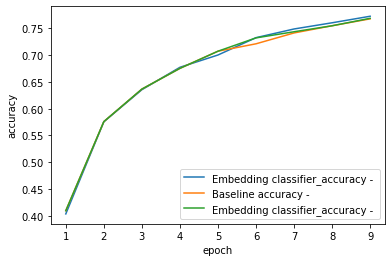

In [6]:
fit_intervention.plot_histories([experiment_paths[0]])
fit_intervention.plot_histories([experiment_paths[1]], plot_baseline=True)

In [5]:
use_experiment_paths_0_25 = ['D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.25--01\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.25--02\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.25--03\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.25--04\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.25--05\\']
use_experiment_paths_0_50 = ['D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.50--06\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.50--07\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.50--08\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.50--09\\',
 'D:\\ICG\\Experiments\\mnist\\Experiment-test-weights\\Experiment-weight-0.50--10\\']

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:/ICG/Experiments/cifar10/Experiment-tsne-weights/Experiment-weight-0.00--01/embeddermodel.h5

test-set evaluation of experiment nr. 1 with 


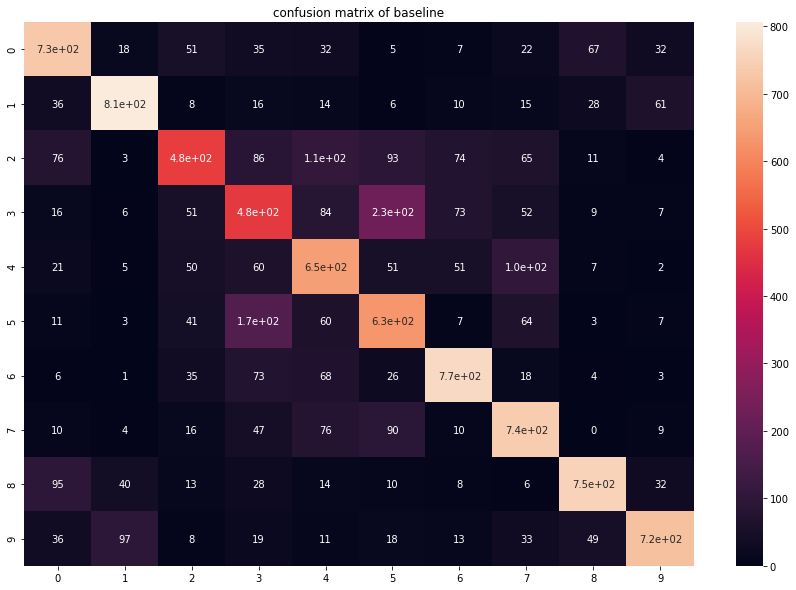

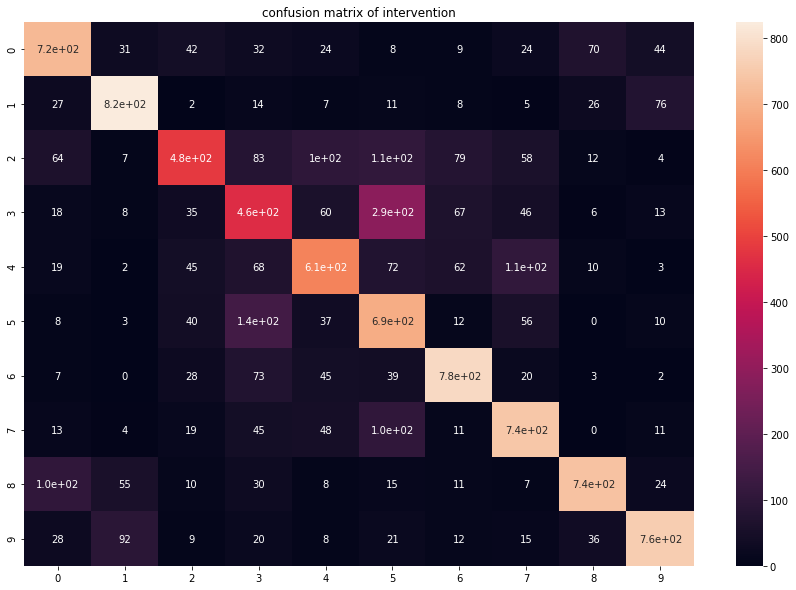

test accuracy of baseline: 0.6745
test accuracy of intervention: 0.6803
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:/ICG/Experiments/cifar10/Experiment-tsne-weights/Experiment-weight-0.00--01/embeddermodel.h5
train embedding of experiment nr. 1 with 


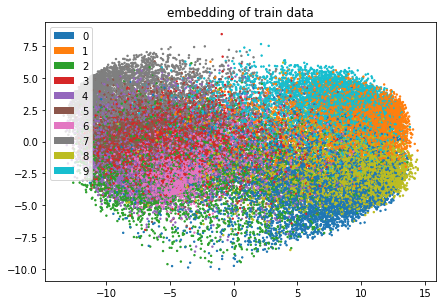

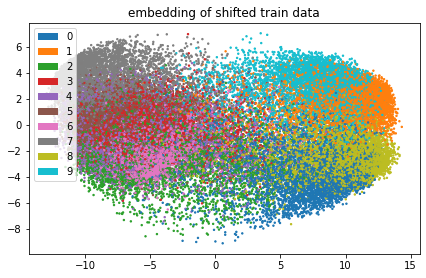

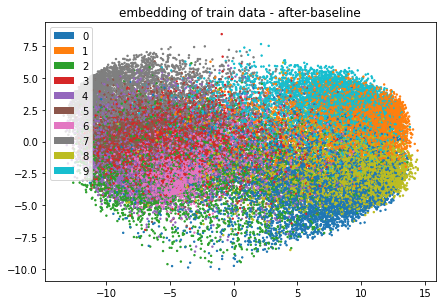

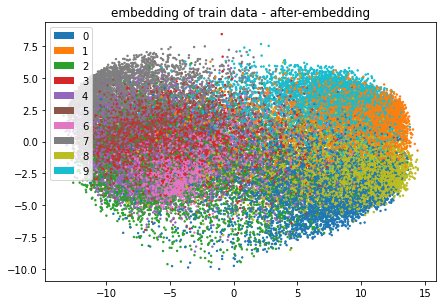

In [8]:
use_experiments = ['D:\\ICG\\Experiments\\cifar10\\Experiment-tsne-weights\\Experiment-weight-0.00--01\\']
fit_intervention.test_set_evaluation(use_experiments)
fit_intervention.plot_embeddings_from_pli_list_train(use_experiments)

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--01/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--02/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--03/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--04/embeddermodel.h5
--Warning! Experiment path already exists. By ca

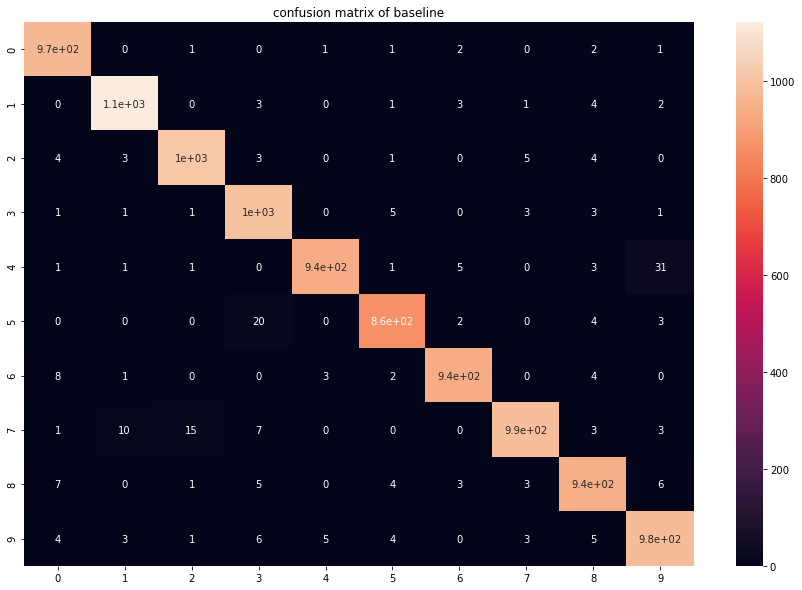

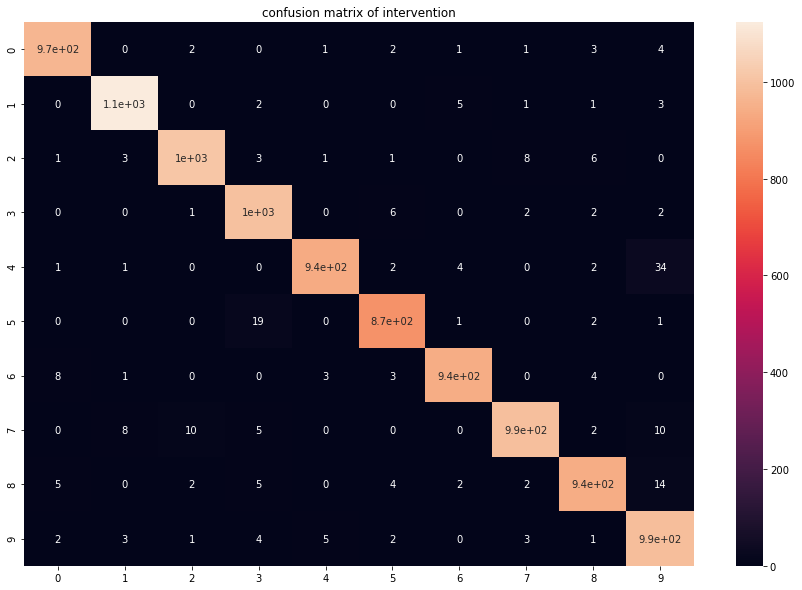

test accuracy of baseline: 0.9754
test accuracy of intervention: 0.9762

test-set evaluation of experiment nr. 2 with weight=0.25


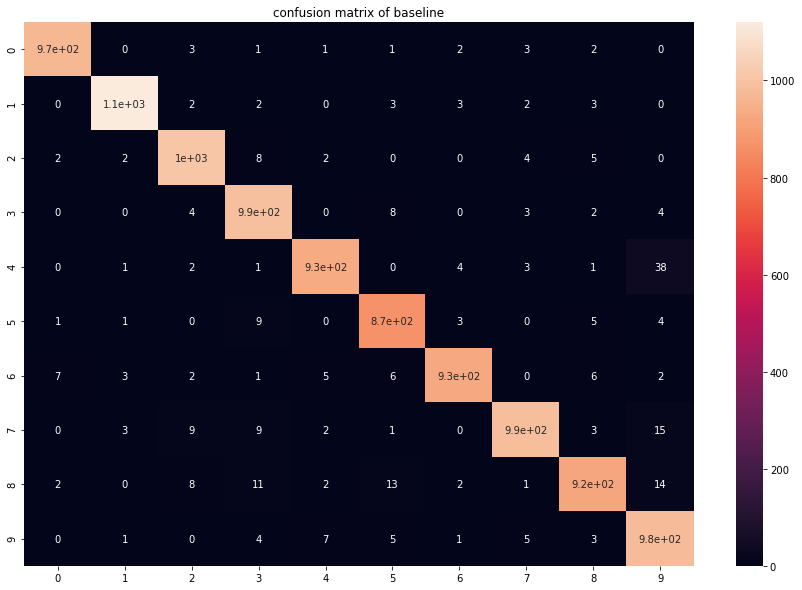

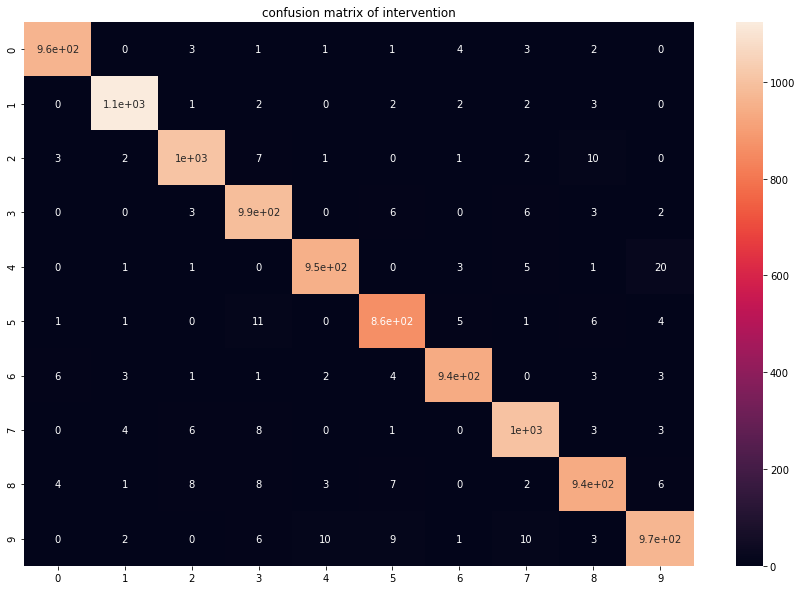

test accuracy of baseline: 0.9702
test accuracy of intervention: 0.9739

test-set evaluation of experiment nr. 3 with weight=0.25


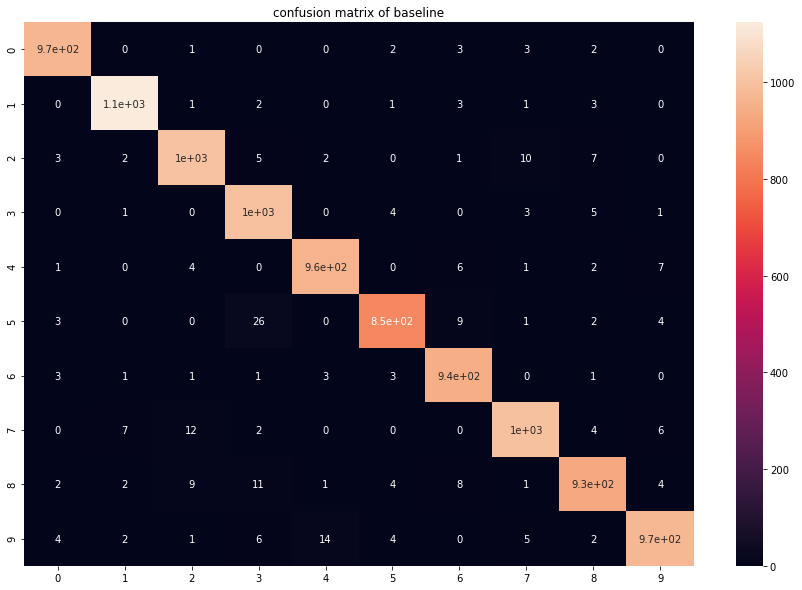

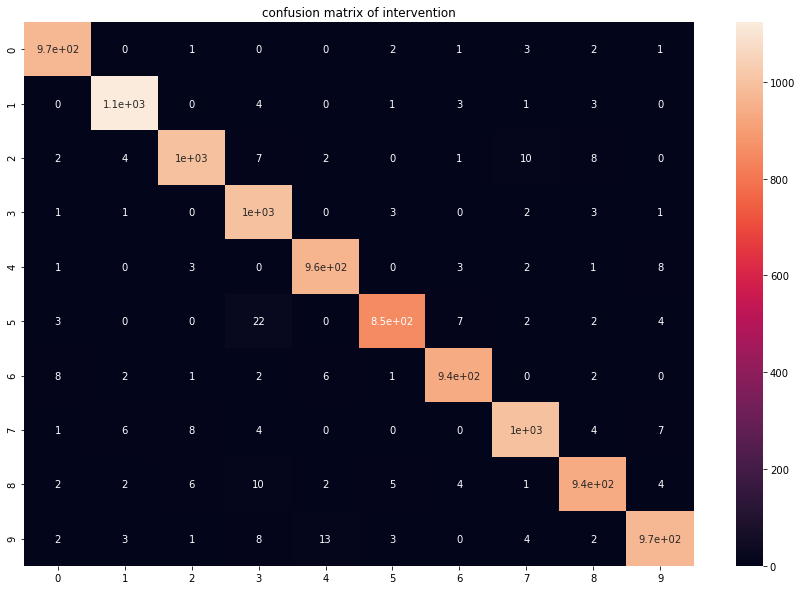

test accuracy of baseline: 0.9744
test accuracy of intervention: 0.9751

test-set evaluation of experiment nr. 4 with weight=0.25


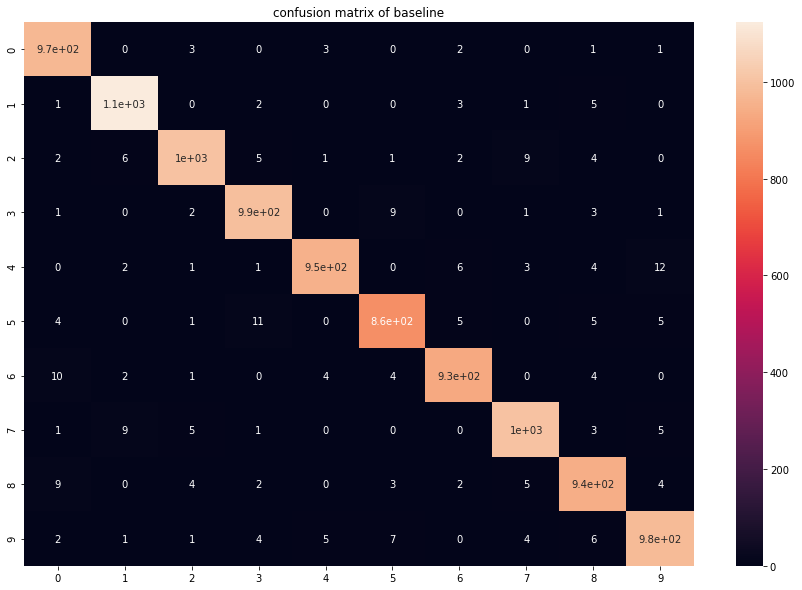

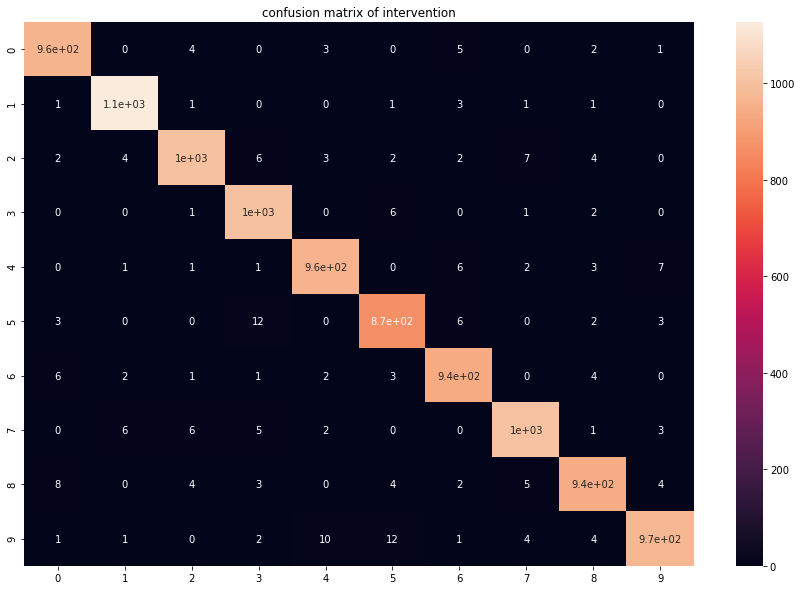

test accuracy of baseline: 0.9763
test accuracy of intervention: 0.9783

test-set evaluation of experiment nr. 5 with weight=0.25


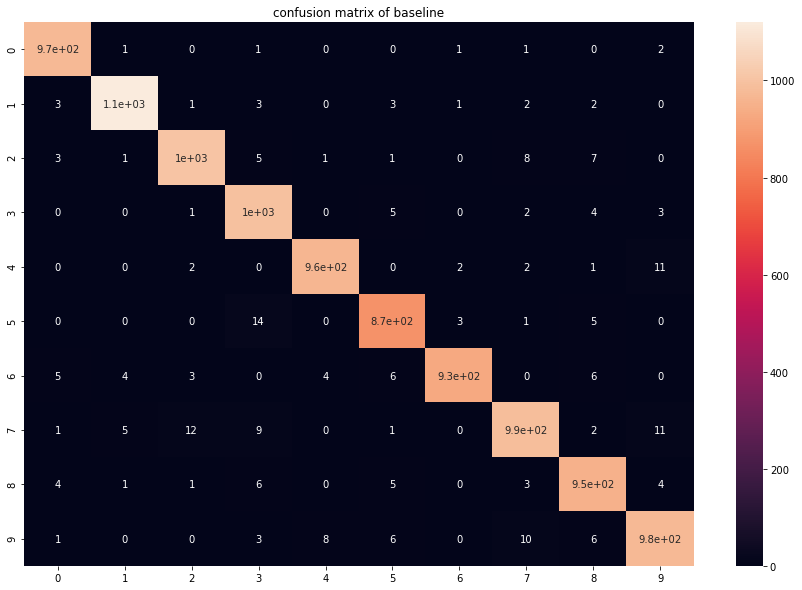

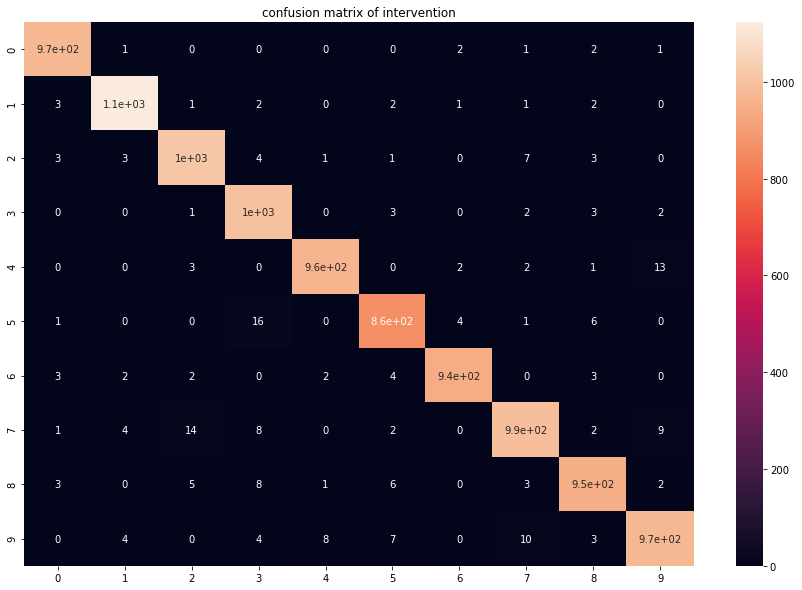

test accuracy of baseline: 0.977
test accuracy of intervention: 0.9779


In [6]:
fit_intervention.test_set_evaluation(use_experiment_paths_0_25, name="weight=0.25")

In [ ]:
fit_intervention.plot_embeddings_from_pli_list_train(use_experiment_paths_0_25, name="weight=0.25")

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--01/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--02/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--03/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--04/embeddermodel.h5
--Warning! Experiment path already exists. By ca

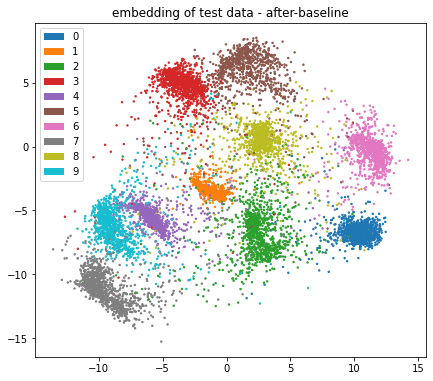

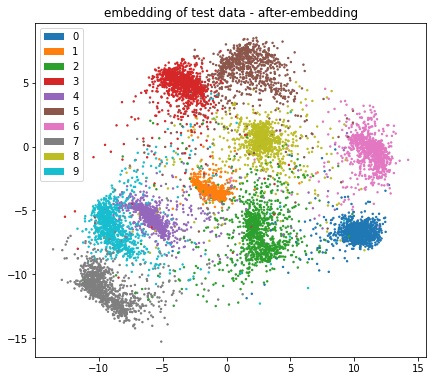

test embedding of experiment nr. 2 with 


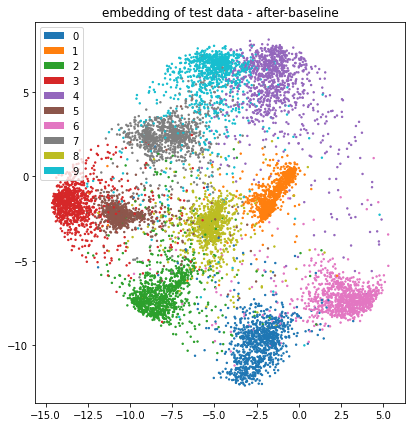

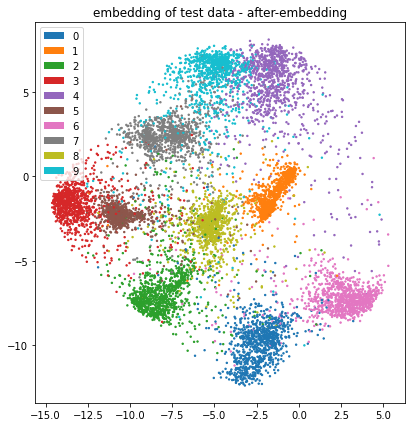

test embedding of experiment nr. 3 with 


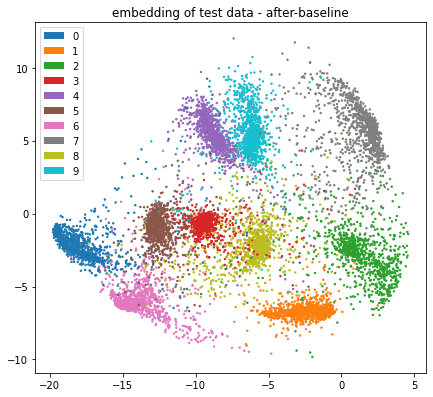

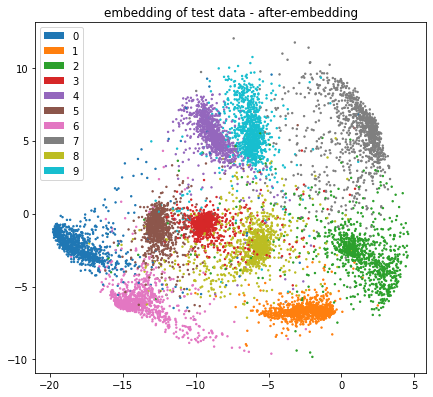

test embedding of experiment nr. 4 with 


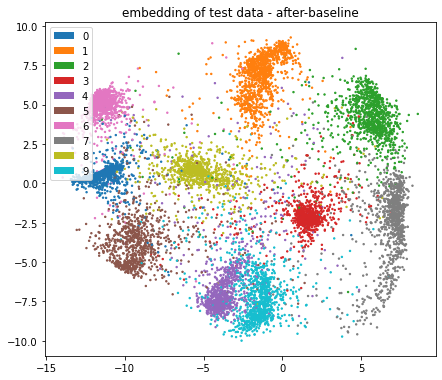

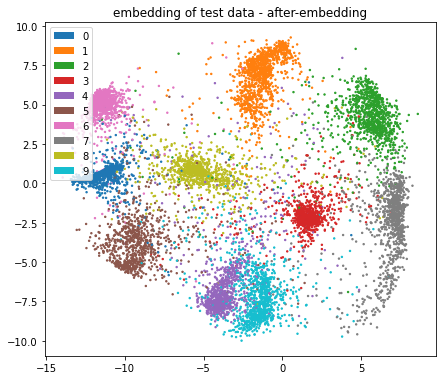

test embedding of experiment nr. 5 with 


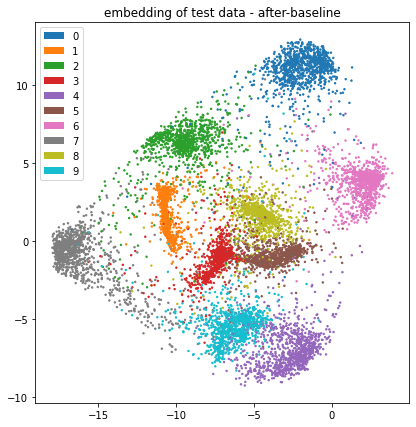

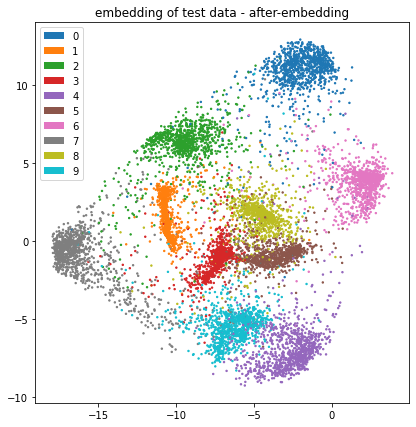

In [6]:
fit_intervention.plot_embeddings_from_pli_list_test(use_experiment_paths_0_25, name="weight=0.25")

--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--01/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--02/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--03/embeddermodel.h5
--Warning! Experiment path already exists. By calling further methods, the current files will be overwritten.--
load embedder model weights from D:\ICG/Experiments/mnist/Experiment-test-weights/Experiment-weight-0.25--04/embeddermodel.h5
--Warning! Experiment path already exists. By ca

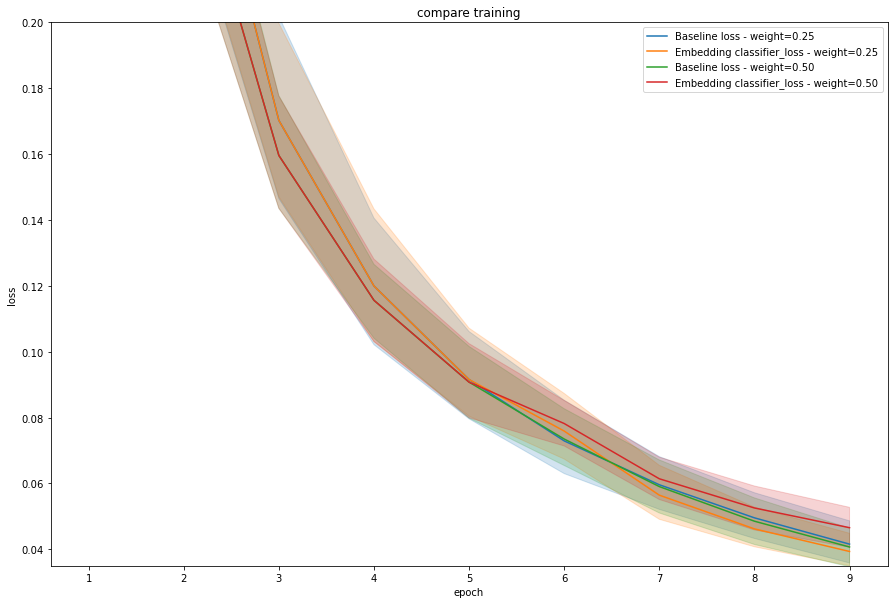

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
fit_intervention.plot_histories(use_experiment_paths_0_25, "loss", "classifier_loss", name="weight=0.25")
fit_intervention.plot_histories(use_experiment_paths_0_50, "loss", "classifier_loss", name="weight=0.50")
plt.ylim(0.035,0.2)
plt.title("compare training")
plt.show()